In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
df = pd.read_hdf('summary.h5')

In [4]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,Max AGN_TimeLag_100_days z band HealpixSlicer,Min AGN_TimeLag_100_days z band HealpixSlicer,N(+3Sigma) AGN_TimeLag_100_days z band HealpixSlicer,N(-3Sigma) AGN_TimeLag_100_days z band HealpixSlicer,AGN_TimeLag_100_days z band HealpixSlicer,25th%ile AGN_TimeLag_100_days z band HealpixSlicer,75th%ile AGN_TimeLag_100_days z band HealpixSlicer,AreaThreshold AGN_TimeLag_100_days z band HealpixSlicer,"Total N Stars, crowding N stars to Precision 0.20 z HealpixSlicer","Total N Stars, no crowding Nstars_no_crowding z HealpixSlicer"
run_name,,,,,,,,,,,,,,,,,,,,,
baseline_v2.2_10yrs,3652.104199,35112.0,0.719403,0.566439,2078065.0,0.0,2078065.0,7.892938,4.853631,2.0,...,778.484825,2.200037,74.0,0.0,17191.0,2.276856,2.445896,14428.297055,2.838834e+09,8.104176e+09
test_h5_v2.2_10yrs,3652.104348,35380.0,0.718255,0.610900,2074754.0,0.0,2074754.0,7.933175,4.857733,2.0,...,2371.839299,2.200090,2.0,0.0,18596.0,2.290187,2.464647,15607.504626,2.843572e+09,8.156815e+09


In [6]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax best 18k',
            'best18k properMotion  HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': '5-10d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_zlim  HealpixSlicer': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'KNe Presto S',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax best 18k', 'proper motion best 18k']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]

In [11]:
runs = [run for run in df.index]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.2_10yrs')


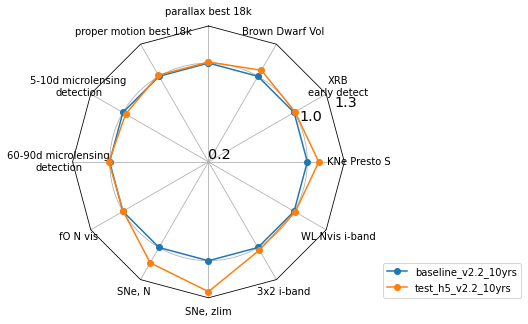

In [13]:
fig, ax = radar(ndata, legend=True, rgrids=[0.2, 1.0, 1.3], bbox_to_anchor=(1.65, 0))


In [10]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol
run_name,,,,,,,,,,,,
baseline_v2.2_10yrs,0.801061,0.187631,0.1636,0.4295,829.0,25261.890,0.20,38.818324,185.0,172.0,1642.0,163349.460298
test_h5_v2.2_10yrs,0.794471,0.185709,0.1594,0.4323,827.0,28887.223,0.25,39.767354,187.0,188.0,1657.0,172597.308674


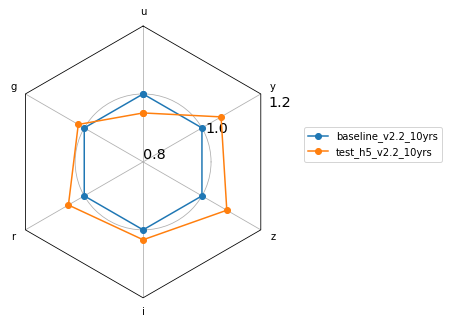

In [14]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.2_10yrs',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.2])